# Criando um modelo de identificação de fraudes


- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

- Informações da base:
    - 'Time' (tempo): contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. 
    - 'Amount' (valor): é o valor da transação 
    - 'Class' (classe): é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.

In [1]:
import pandas as pd

In [2]:
base = pd.read_csv('creditcard.csv')
base.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### Verificando as informações

In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Resumo estatístico

In [4]:
base.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Verificando valores nulos

In [5]:
base.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Ajustando escalas com o StandardScaler

### Separando X e Y

In [6]:
X = base.drop("Class", axis = 1)
y = base.Class

### Separando Treino e teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42, stratify=y)

### StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Balanceando dataset com Imbalanced-learn

### Qual o percentual de transações que são fraudes?

In [11]:
numero_total = base.shape[0]
fraude = base.Class.value_counts()[1]
porcentagem_fraude = (fraude / numero_total) * 100
porcentagem_fraude.round(2) 

0.17

### Visualizando Graficamente

<Axes: ylabel='count'>

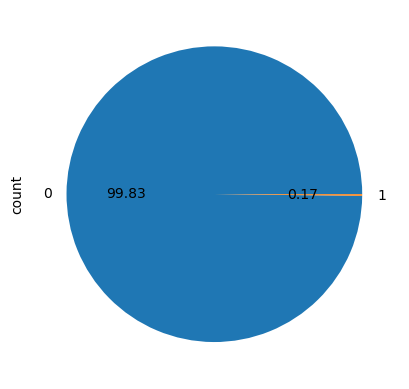

In [12]:
base.Class.value_counts().plot.pie(autopct="%.2f")

In [13]:
# Verificando a quantidade de valores de y_trein
y_train.value_counts()

Class
0    190490
1       330
Name: count, dtype: int64

## RandomUnderSampler
### Excluindo registros de forma aleatória

In [14]:
from imblearn.under_sampling import RandomUnderSampler 

In [15]:
# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [16]:
# Definindo a nova amostra
X_resRU, y_resRU = rus.fit_resample(X_train, y_train)

In [17]:
# Verificando a quantidade de valores de y
y_resRU.value_counts()

Class
0    330
1    330
Name: count, dtype: int64

# Classificando com os dados balanceados

# Classificando com Arvore de decisao

In [18]:
from sklearn import tree

### Fit e predição

In [19]:
clf_AD = tree.DecisionTreeClassifier(random_state=42).fit(X_resRU, y_resRU)
y_pred_AD = clf_AD.predict(X_test)

### predict_proba

In [20]:
y_pred_proba_AD = clf_AD.predict_proba(X_test)[:,1]
y_pred_proba_AD

array([0., 0., 0., ..., 0., 0., 1.])

### Matriz de confusao

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,y_pred_AD)

array([[84484,  9341],
       [   15,   147]], dtype=int64)

# Classificando com Regressão logistica

In [23]:
from sklearn.linear_model import LogisticRegression

### Fit e predição

In [24]:
clf_RL = LogisticRegression(random_state=0, max_iter=10000).fit(X_resRU, y_resRU);
y_pred_RL = clf_RL.predict(X_test);

### Pred_proba e Matriz de confusão

In [25]:
y_pred_proba_RL = clf_RL.predict_proba(X_test)[:,1]
y_pred_proba_RL

array([3.51671072e-03, 1.10302386e-04, 8.45733769e-03, ...,
       1.25777185e-03, 1.13377620e-02, 4.42063942e-01])

In [26]:
confusion_matrix(y_test,y_pred_RL)

array([[90242,  3583],
       [   16,   146]], dtype=int64)

# Classificando com Support Vector Machine

In [27]:
from sklearn.svm import SVC

### Fit e predição

In [28]:
clf_SVC = SVC(random_state=0,probability=True).fit(X_resRU, y_resRU)
y_pred_SVC = clf_SVC.predict(X_test)

### Pred_proba e Matriz de Confusão

In [29]:
y_pred_proba_SVC = clf_SVC.predict_proba(X_test)[:,1]
y_pred_proba_SVC

array([0.02110115, 0.01031894, 0.25859645, ..., 0.02955345, 0.04182747,
       0.13773503])

In [30]:
confusion_matrix(y_test,y_pred_SVC)

array([[92431,  1394],
       [   24,   138]], dtype=int64)

# Classificando com KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

### Fit e predição

In [32]:
clf_KNN = KNeighborsClassifier(n_neighbors=3).fit(X_resRU, y_resRU)
y_pred_KNN = clf_KNN.predict(X_test)

### Pred_proba e Matriz de confusão

In [33]:
y_pred_proba_KNN = clf_KNN.predict_proba(X_test)[:,1]

In [34]:
confusion_matrix(y_test,y_pred_KNN)  

array([[90892,  2933],
       [   19,   143]], dtype=int64)

# Classificando com Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

### Fit e predição

In [36]:
clf_RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_resRU, y_resRU)
y_pred_RF = clf_RF.predict(X_test)

### Pred_proba e Matriz de confusão

In [37]:
y_pred_proba_RF = clf_RF.predict_proba(X_test)[:,1]

In [38]:
confusion_matrix(y_test,y_pred_RF)

array([[93168,   657],
       [   25,   137]], dtype=int64)

# Comparando os modelos

In [39]:
from sklearn import metrics

### Visualizando precisão e recall de cada modelo

Não é um bom metodo para comparar

In [40]:
print(metrics.precision_score(y_test,y_pred_AD))
print(metrics.recall_score(y_test,y_pred_AD))
print(metrics.precision_score(y_test,y_pred_RL))
print(metrics.recall_score(y_test,y_pred_RL))
print(metrics.precision_score(y_test,y_pred_SVC))
print(metrics.recall_score(y_test,y_pred_SVC))
print(metrics.precision_score(y_test,y_pred_KNN))
print(metrics.recall_score(y_test,y_pred_KNN))
print(metrics.precision_score(y_test,y_pred_RF))
print(metrics.recall_score(y_test,y_pred_RF))

0.015493254637436763
0.9074074074074074
0.0391525878251542
0.9012345679012346
0.09007832898172324
0.8518518518518519
0.0464889466840052
0.8827160493827161
0.172544080604534
0.845679012345679


## Gerando parâmetros da curva AUPRC (Precisao x Recall)

In [41]:
precision_AD,recall_AD,thresholds_AD = metrics.precision_recall_curve(y_test,y_pred_proba_AD)
precision_RL,recall_RL,thresholds_RL = metrics.precision_recall_curve(y_test,y_pred_proba_RL)
precision_SVC,recall_SVC,thresholds_SVC = metrics.precision_recall_curve(y_test,y_pred_proba_SVC)
precision_KNN,recall_KNN,thresholds_KNN = metrics.precision_recall_curve(y_test,y_pred_proba_KNN)
precision_RF,recall_RF,thresholds_RF = metrics.precision_recall_curve(y_test,y_pred_proba_RF)

## Visualizando graficamente

In [42]:
import matplotlib.pyplot as plt

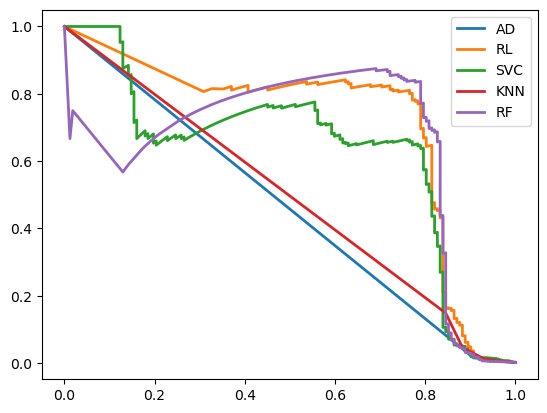

In [43]:
fig, ax = plt.subplots()

ax.plot(recall_AD, precision_AD, linewidth=2.0,label='AD')
ax.plot(recall_RL, precision_RL, linewidth=2.0,label='RL')
ax.plot(recall_SVC, precision_SVC, linewidth=2.0,label='SVC')
ax.plot(recall_KNN, precision_KNN, linewidth=2.0,label='KNN')
ax.plot(recall_RF, precision_RF, linewidth=2.0,label='RF')

ax.legend()

plt.show()

### Avaliando numericamente área abaixo da curva

In [44]:
print(metrics.auc(recall_AD, precision_AD))
print(metrics.auc(recall_RL, precision_RL))
print(metrics.auc(recall_SVC, precision_SVC))
print(metrics.auc(recall_KNN, precision_KNN))
print(metrics.auc(recall_RF, precision_RF))

0.46153012929239556
0.7099282757596406
0.6232455639372207
0.49109268952250745
0.6504912358563952


### Notamos que a Regressao logistica obteve o melhor resultado

# GridSearchCV: Selecionando hiperparametros para a Regressão logistica

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Retirando temporariamente os warnings do nosso código
import warnings
warnings.filterwarnings('ignore')

### Definindo os parâmetros que queremos testar

In [47]:
parametros = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
}

### Selecionando o modelo e fazendo fit com os parametros selecionados e modo de comparação

In [48]:
LogReg = LogisticRegression(random_state=42)
clf_GS = GridSearchCV(LogReg, parametros,
                     scoring='recall')

#### Fazendo fit

In [49]:
clf_GS = clf_GS.fit(X_resRU,y_resRU)

### Visualizando os melhores parâmetros definidos pelo GridSearchCV 

In [50]:
clf_GS.best_params_

{'C': 0.001, 'solver': 'liblinear'}

### Usando esse modelo para fazer as previsões

In [51]:
y_pred_GS = clf_GS.predict(X_test)

# Analisando o modelo atraves das metricas

In [52]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

### Matriz de confusão

In [53]:
confusion_matrix(y_test,y_pred_GS)

array([[82441, 11384],
       [    8,   154]], dtype=int64)

### Recall

In [54]:
recall_score(y_test,y_pred_GS)

0.9506172839506173